# Team selection
We want to choose our dream team. The rules for choosing are:

* One player in each position - PG, SG, SF, PF, C.
* One player only from each of the last five decades - 2010's, 2000's, 1990's, 1980's, 1970's.

In [165]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import permutations

## Load data

In [93]:
players_df = pd.read_csv('../data/interim/player_data_cleaned.csv', header=0, index_col=0, sep=',')
players_df['decades'] = players_df['decades'].apply(lambda x: tuple(x.split('|')))
players_df['positions'] = players_df['positions'].apply(lambda x: tuple(x.split('|')))
players_df.head()

,height,weight,collage,born,birth_city,birth_state,decades,positions,G,MP,...,WS,TRB,FG%,2P%,3P%,FT%,APG,PPG,PFPG,WS48
Player,,,,,,,,,,,,,,,,,,,,,
Freddie Lewis,188.0,88.0,Eastern Kentucky University,1921.0,Brooklyn,New York,"(70s,)","(PG,)",32.0,552.0,...,0.5,47.0,0.407035,0.407035,0.000000,0.805195,1.750000,7.000000,1.812500,0.043478
Bob Cousy*,185.0,79.0,College of the Holy Cross,1928.0,New York,New York,"(70s,)","(PG,)",7.0,34.0,...,0.1,5.0,0.333333,0.333333,0.000000,1.000000,1.428571,0.714286,1.571429,0.141176
Richie Guerin*,193.0,88.0,Iona College,1932.0,New York,New York,"(70s,)","(SG,)",8.0,64.0,...,-0.1,2.0,0.272727,0.272727,0.000000,1.000000,1.500000,0.875000,1.125000,-0.075000
Jim Paxson,198.0,90.0,University of Dayton,1932.0,Pennville,Indiana,"(80s, 90s)","(PG, SG)",829.0,22158.0,...,55.0,1638.0,0.496448,0.510195,0.225877,0.808320,2.866104,13.927624,1.827503,0.119144
Hot Rod,193.0,83.0,NaN,1935.0,NaN,NaN,"(80s, 90s)","(PF, C)",887.0,26327.0,...,70.6,5998.0,0.480146,0.481075,0.105263,0.725792,1.794814,11.030440,2.540023,0.128720


## Explore dataset
Lets see if there are any correlations in the dataset.

In [94]:
cols = players_df.columns[8:]

Lets visualise the Spearman rank correlation coefficient. Note that we use this rather than a linear correlation coefficient since a rank-based will capture non-linear correlations.

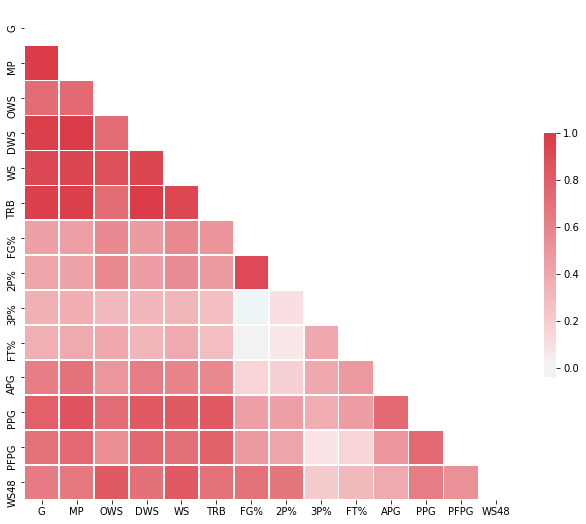

In [95]:
# compute the correlation matrix
corr = players_df.loc[:, cols].corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

We can also visualise the data itself on a pair plot.

## Choosing the dream team
Lets move on to choosing our dream team. The simplest approach is to select or create a metric by which to rank players, and select the five player which maximise this metric with respect to the rules stated above. For our first pass we will use win shares per 48 minutes (WS48), which measures how much a player contributes to a team's win on average per game (a game lasts 48 minutes). Lets look at the WS48 feature in more detail.

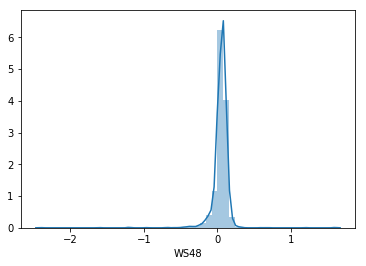

In [96]:
sns.distplot(players_df['WS48'])
plt.show()

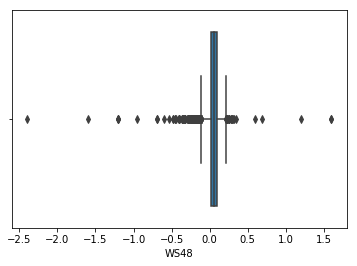

In [97]:
sns.boxplot(x='WS48', data=players_df)
plt.show()

The bulk of the distribution is around zero, with some outliers ate either end. Next lets look at the top players by WS48. Here are the top 20 players.

In [98]:
players_df.sort_values(by='WS48', ascending=False).iloc[:20, 6:]

,decades,positions,G,MP,OWS,DWS,WS,TRB,FG%,2P%,3P%,FT%,APG,PPG,PFPG,WS48
Player,,,,,,,,,,,,,,,,
Chad Gallagher,"(90s,)","(C,)",2.0,3.0,0.1,0.0,0.1,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.600000
Tyson Wheeler,"(90s,)","(PG,)",1.0,3.0,0.1,0.0,0.1,0.0,1.000000,0.000000,1.000000,0.500000,2.000000,4.000000,1.000000,1.600000
Cedric Lewis,"(90s,)","(C,)",3.0,4.0,0.0,0.0,0.1,2.0,0.666667,0.666667,0.000000,0.000000,0.000000,1.333333,0.000000,1.200000
Cozell McQueen,"(80s,)","(PF,)",3.0,7.0,0.1,0.0,0.1,8.0,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.333333,0.685714
Bob Miller,"(80s,)","(PF,)",2.0,8.0,0.0,0.0,0.1,5.0,0.666667,0.666667,0.000000,0.000000,0.500000,2.000000,2.500000,0.600000
Alvin Heggs,"(90s,)","(SF,)",4.0,14.0,0.1,0.0,0.1,2.0,0.600000,0.600000,0.000000,0.666667,0.000000,2.000000,0.000000,0.342857
Korleone Young,"(90s,)","(SF,)",3.0,15.0,0.1,0.0,0.1,4.0,0.500000,0.666667,0.250000,1.000000,0.333333,4.333333,1.000000,0.320000
Boban Marjanovic,"(10s,)","(C,)",89.0,801.0,3.5,1.7,5.1,324.0,0.578431,0.578431,0.000000,0.779070,0.337079,5.483146,0.887640,0.305618
Geno Carlisle,"(00s,)","(SG,)",6.0,16.0,0.1,0.0,0.1,1.0,0.666667,0.666667,0.000000,0.666667,0.166667,1.333333,0.166667,0.300000


The simplest way of choosing the best team based on WS48 is to choose the highest values per position per decade, then optimise based on that list. First we need to flatten the players data frame so each row is a unique combination of player, decade, and position.

In [99]:
players_df_flat = players_df.reset_index() \
                            .set_index(['Player', 'positions'])['decades'] \
                            .apply(pd.Series) \
                            .stack() \
                            .reset_index() \
                            .drop('level_2', axis=1) \
                            .rename(columns={0: 'decade'}) \
                            .set_index(['Player', 'decade'])['positions'] \
                            .apply(pd.Series)\
                            .stack() \
                            .reset_index() \
                            .drop('level_2', axis=1) \
                            .rename(columns={0: 'position'})

players_df_flat = pd.merge(left=players_df_flat,
                           right=players_df.reset_index().loc[:, ['Player', 'WS48']],
                           on='Player',
                           how='outer')

players_df_flat.head(10)

,Player,decade,position,WS48
0,Freddie Lewis,70s,PG,0.043478
1,Bob Cousy*,70s,PG,0.141176
2,Richie Guerin*,70s,SG,-0.075000
3,Jim Paxson,80s,PG,0.119144
4,Jim Paxson,80s,SG,0.119144
5,Jim Paxson,90s,PG,0.119144
6,Jim Paxson,90s,SG,0.119144
7,Hot Rod,80s,PF,0.128720
8,Hot Rod,80s,C,0.128720
9,Hot Rod,90s,PF,0.128720


Next, we need to get the player with the highest WS48 for each unique combination of decade and position. We could end up with the same player in multiple positions, but lets try anyway and hope for the best!

In [173]:
top_players = players_df_flat.groupby(['decade', 'position']) \
                             .apply(lambda df: df.sort_values(by='WS48', ascending=False).iloc[0, :])

top_players

Player decade position      WS48
decade position                                                
00s    C              David Robinson*    00s        C  0.250427
       PF                LeBron James    00s       PF  0.239116
       PG                  Chris Paul    00s       PG  0.250476
       SF             Michael Jordan*    00s       SF  0.250352
       SG               Geno Carlisle    00s       SG  0.300000
10s    C             Boban Marjanovic    10s        C  0.305618
       PF                   Ryan Reid    10s       PF  0.282353
       PG           Demetrius Jackson    10s       PG  0.282353
       SF                LeBron James    10s       SF  0.239116
       SG                LeBron James    10s       SG  0.239116
70s    C         Kareem Abdul-Jabbar*    70s        C  0.228361
       PF                 Don Nelson*    70s       PF  0.179076
       PG                 Jerry West*    70s       PG  0.214137
       SF                Chet Walker*    70s       SF  0.204036
       SG             Marques Johnson    70s       SG  0.161459
80s    C              Edmund Lawrence    80s        C  0.252632
       PF              Cozell McQueen    80s       PF  0.685714
       PG              Magic Johnson*    80s       PG  0.224804
       SF             Michael Jordan*    80s       SF  0.250352
       SG             Michael Jordan*    80s       SG  0.250352
90s    C               Chad Gallagher    90s        C  1.600000
       PF              Magic Johnson*    90s       PF  0.224804
       PG               Tyson Wheeler    90s       PG  1.600000
       SF                 Alvin Heggs    90s       SF  0.342857
       SG             Michael Jordan*    90s       SG  0.250352

Now we must find the best combination of player - i.e. the combination with the highest mean WS48 score - based on the rules described above. First, we need every permutation of team configuration by decade and position.

In [226]:
decades = top_players['decade'].unique().tolist()
positions = top_players['position'].unique().tolist()

team_perms = pd.DataFrame([list(zip(decade, positions)) for decade in permutations(decades, len(positions))])

team_perms.head()

,0,1,2,3,4
0,"(00s, C)","(10s, PF)","(70s, PG)","(80s, SF)","(90s, SG)"
1,"(00s, C)","(10s, PF)","(70s, PG)","(90s, SF)","(80s, SG)"
2,"(00s, C)","(10s, PF)","(80s, PG)","(70s, SF)","(90s, SG)"
3,"(00s, C)","(10s, PF)","(80s, PG)","(90s, SF)","(70s, SG)"
4,"(00s, C)","(10s, PF)","(90s, PG)","(70s, SF)","(80s, SG)"


Next, we calculate the mean WS48 for each permutation.

In [253]:
team_perms['WS48'] = team_perms.apply(lambda row: top_players.loc[row.tolist(), 'WS48'].tolist()).mean(axis=1)

team_perms.head()

,0,1,2,3,4,WS48
0,"(00s, C)","(10s, PF)","(70s, PG)","(80s, SF)","(90s, SG)",0.249524
1,"(00s, C)","(10s, PF)","(70s, PG)","(90s, SF)","(80s, SG)",0.268025
2,"(00s, C)","(10s, PF)","(80s, PG)","(70s, SF)","(90s, SG)",0.242394
3,"(00s, C)","(10s, PF)","(80s, PG)","(90s, SF)","(70s, SG)",0.252380
4,"(00s, C)","(10s, PF)","(90s, PG)","(70s, SF)","(80s, SG)",0.517434


Finally, lets choose the best team.

In [298]:
best_team_perm_df = team_perms[team_perms['WS48'] == team_perms['WS48'].max()]
best_team_perm = pd.Series(best_team_perm_df.iloc[0, :5].T).tolist()
best_team_ws48 = best_team_perm_df.iloc[0, -1]

best_team = top_players.loc[best_team_perm, ['Player', 'WS48']] \
                       .reset_index() \
                       .set_index('Player')

best_team

,decade,position,WS48
Player,,,
Boban Marjanovic,10s,C,0.305618
Cozell McQueen,80s,PF,0.685714
Tyson Wheeler,90s,PG,1.600000
Chet Walker*,70s,SF,0.204036
Geno Carlisle,00s,SG,0.300000


And so we have our final team! We didn't get any duplicated players, but if we did we would have only had more permutations for which to calculate the mean WS48 before choosing our team. Lets save our best team for later use.

In [299]:
best_team.to_csv('../data/processed/best_team.csv', header=True, index=True, sep=',')